In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import nibabel as nib

from deep_quality_estimation.core.center_of_mass import (
    View,
    compute_center_of_mass,
    get_center_of_mass_slices,
)

In [3]:
example_data = Path(
    "/home/marcelrosier/bstar_regression/data_creation/selection/brats_2013_pat0116_1"
)
gt_segmentation = example_data / "brats_2013_pat0116_1_gt.nii.gz"

t1c_file = example_data / "brats_2013_pat0116_1_t1c.nii.gz"
t1_file = example_data / "brats_2013_pat0116_1_t1.nii.gz"
t2_file = example_data / "brats_2013_pat0116_1_t2.nii.gz"
fla_file = example_data / "brats_2013_pat0116_1_fla.nii.gz"

In [4]:
com = compute_center_of_mass(gt_segmentation)

In [5]:
t1c_slices = get_center_of_mass_slices(file=t1c_file, center_of_mass=com)
seg_slcies = get_center_of_mass_slices(file=gt_segmentation, center_of_mass=com)

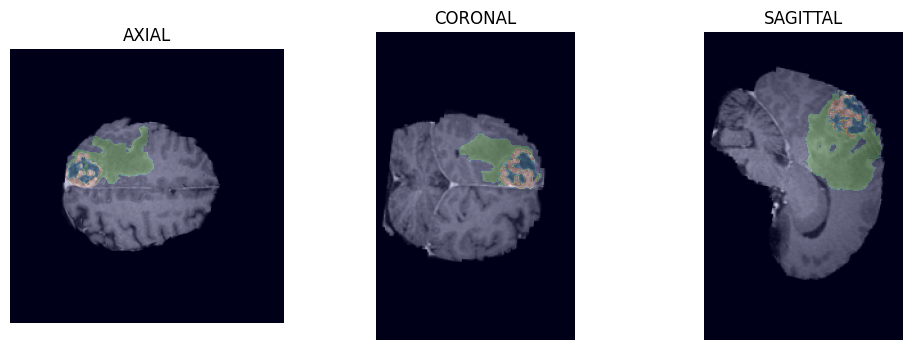

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for i, view in enumerate(t1c_slices.keys()):
    ax[i].imshow(t1c_slices[view], cmap="grey")
    ax[i].imshow(seg_slcies[view], cmap="jet", alpha=0.2)
    ax[i].set_title(view.name)
    ax[i].axis("off")

(240, 240)
(240, 155)
(240, 155)


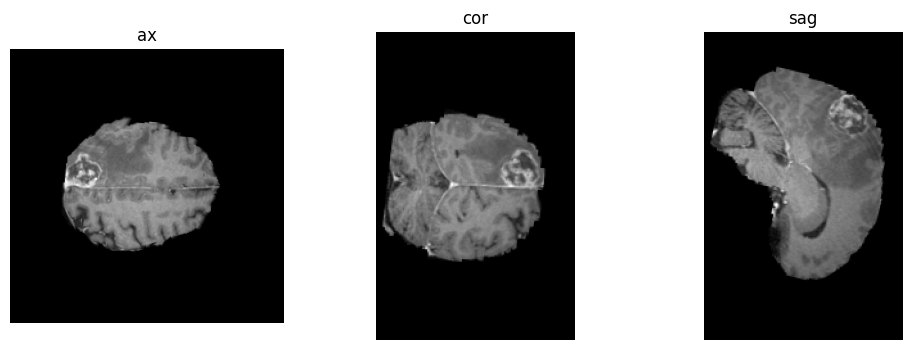

In [7]:
# reference
ax = Path(
    "/home/marcelrosier/bstar_regression/data_creation/output_participant/brats_2013_pat0116_1_ax_gt_ablaze_gull/t1c.nii.gz"
)
cor = Path(
    "/home/marcelrosier/bstar_regression/data_creation/output_participant/brats_2013_pat0116_1_cor_gt_ablaze_gull/t1c.nii.gz"
)
sag = Path(
    "/home/marcelrosier/bstar_regression/data_creation/output_participant/brats_2013_pat0116_1_sag_gt_ablaze_gull/t1c.nii.gz"
)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, img_path in enumerate([ax, cor, sag]):
    img = nib.load(img_path).get_fdata()
    print(img.shape)
    axes[i].imshow(img, cmap="grey")
    axes[i].set_title(img_path.parent.name.split("_")[-4])
    axes[i].axis("off")

In [8]:
# use case for data loader

center_of_mass = compute_center_of_mass(gt_segmentation)

seg_slices = get_center_of_mass_slices(
    file=gt_segmentation, center_of_mass=center_of_mass
)

t1c_slices = get_center_of_mass_slices(file=t1c_file, center_of_mass=center_of_mass)
t1_slices = get_center_of_mass_slices(file=t1_file, center_of_mass=center_of_mass)
t2_slices = get_center_of_mass_slices(file=t2_file, center_of_mass=center_of_mass)
fla_slices = get_center_of_mass_slices(file=fla_file, center_of_mass=center_of_mass)

In [35]:
dicts = []
for view in View:
    dicts.append(
        {
            "t1": t1c_slices[view],
            "t1c": t1_slices[view],
            "t2": t2_slices[view],
            "fla": fla_slices[view],
            "seg": seg_slices[view],
            "images": [
                t1c_slices[view],
                t1_slices[view],
                t2_slices[view],
                fla_slices[view],
            ],
            "labels": [seg_slices[view]],
            "view": view,
        }
    )

In [36]:
for d in dicts:
    print(d["view"], d.keys())

View.AXIAL dict_keys(['t1', 't1c', 't2', 'fla', 'seg', 'images', 'labels', 'view'])
View.CORONAL dict_keys(['t1', 't1c', 't2', 'fla', 'seg', 'images', 'labels', 'view'])
View.SAGITTAL dict_keys(['t1', 't1c', 't2', 'fla', 'seg', 'images', 'labels', 'view'])


In [ ]:
from deep_quality_estimation.core.dataloader import get_data_loader, get_dataset

In [51]:
ds = get_dataset(
    t1c=t1c_file, t1=t1_file, t2=t2_file, fla=fla_file, seg=gt_segmentation
)
for d in ds:
    for k, v in d.items():
        print(k, v.shape if not isinstance(v, View) else v)

(240, 240)
(240, 155)
(240, 155)
t1 (240, 240)
t1c (240, 240)
t2 (240, 240)
fla (240, 240)
seg (240, 240)
image torch.Size([4, 240, 240])
label torch.Size([3, 240, 240])
view View.AXIAL
inputs torch.Size([7, 240, 240])
t1 (240, 155)
t1c (240, 155)
t2 (240, 155)
fla (240, 155)
seg (240, 155)
image torch.Size([4, 240, 240])
label torch.Size([3, 240, 240])
view View.CORONAL
inputs torch.Size([7, 240, 240])
t1 (240, 155)
t1c (240, 155)
t2 (240, 155)
fla (240, 155)
seg (240, 155)
image torch.Size([4, 240, 240])
label torch.Size([3, 240, 240])
view View.SAGITTAL
inputs torch.Size([7, 240, 240])


dict_keys(['t1', 't1c', 't2', 'fla', 'seg', 'images', 'labels', 'view', 'inputs'])
['AXIAL']
torch.Size([1, 4, 240, 240])
dict_keys(['t1', 't1c', 't2', 'fla', 'seg', 'images', 'labels', 'view', 'inputs'])
['CORONAL']
torch.Size([1, 4, 240, 240])


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/home/marcelrosier/miniconda3/envs/dqe_test/lib/python3.9/multiprocessing/queues.py", line 239, in _feed
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/home/marcelrosier/miniconda3/envs/dqe_test/lib/python3.9/multiprocessing/queues.py", line 239, in _feed
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/home/marcelrosier/miniconda3/envs/dqe_test/lib/python3.9/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/home/marcelrosier/miniconda3/envs/dqe_test/lib/python3.9/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/home/marcelrosier/miniconda3/envs/dqe_test/lib/python3.9/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last)

dict_keys(['t1', 't1c', 't2', 'fla', 'seg', 'images', 'labels', 'view', 'inputs'])
['SAGITTAL']
torch.Size([1, 4, 240, 240])


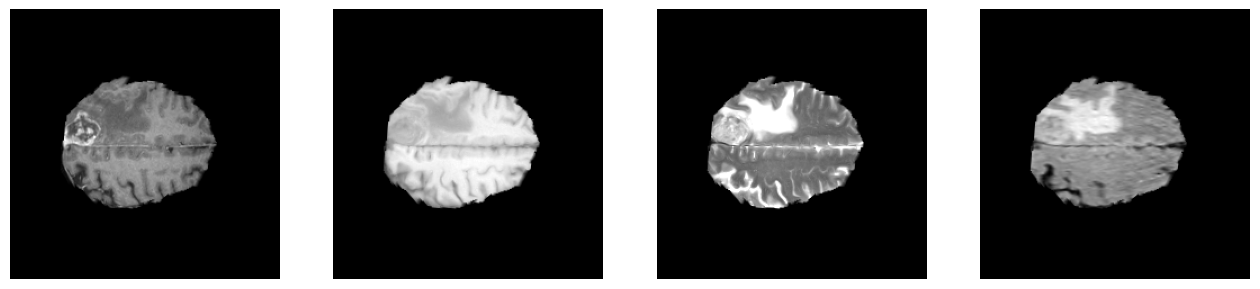

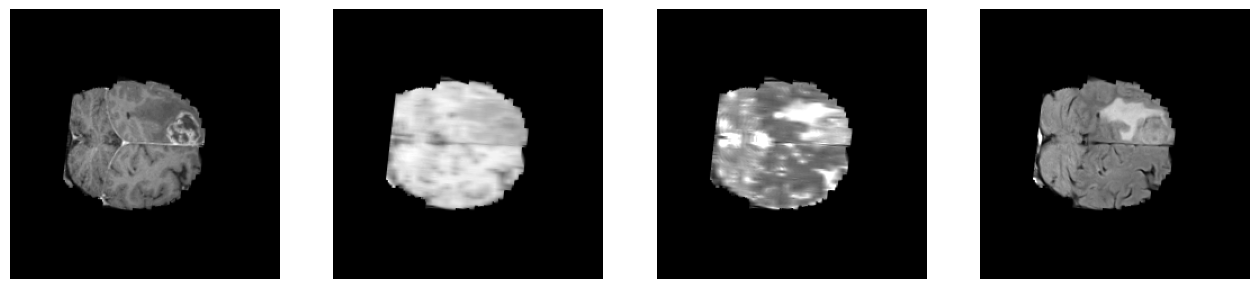

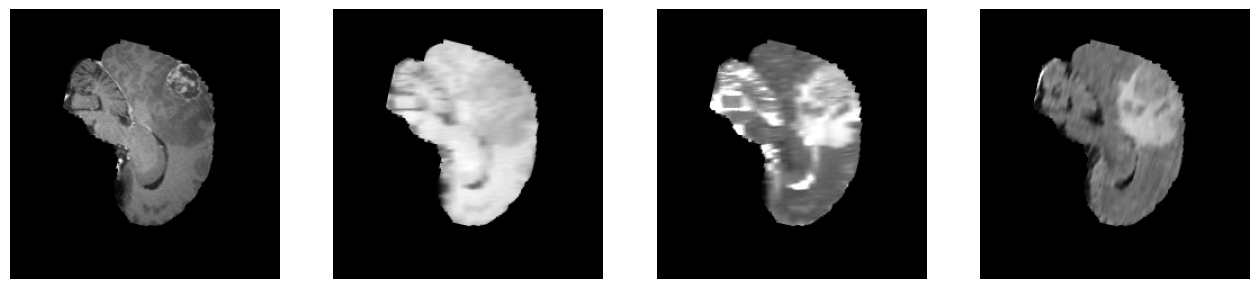

In [82]:
dl = get_data_loader(
    t1c=t1c_file, t1=t1_file, t2=t2_file, fla=fla_file, seg=gt_segmentation
)
for batch in dl:
    print(batch.keys())
    print(batch["view"])
    print(batch["images"].shape)
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    for i, img in enumerate(batch["images"][0]):
        axes[i].imshow(img, cmap="grey")
        axes[i].axis("off")

In [94]:
import os
import torch
from monai.networks.nets import DenseNet201, DenseNet121

checkpoint_path = "/home/marcelrosier/bstar_regression/checkpoint_last.pth.tar"
model = DenseNet121(spatial_dims=2, in_channels=7, out_channels=1, pretrained=False)

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
multi_gpu = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# M O D E L
# load checkpoint / best, dice or last
# checkpoint_path = Path("checkpoints/checkpoint_last.pth.tar")
# checkpoint_path = Path("checkpoints/checkpoint_dice.pth.tar")

print("checkpoint exists?", os.path.exists(checkpoint_path))
checkpoint = torch.load(checkpoint_path, map_location="cpu", weights_only=False)

# model = DenseNet201(spatial_dims=2, in_channels=5, out_channels=1, pretrained=False)
if multi_gpu:
    model = torch.nn.DataParallel(model)
else:
    if "module." in list(checkpoint["model_state"].keys())[0]:
        checkpoint["model_state"] = {
            k.replace("module.", ""): v for k, v in checkpoint["model_state"].items()
        }
model = model.to(device)

# load cp
print("checkpoint:", checkpoint.keys())
model.load_state_dict(checkpoint["model_state"])

checkpoint exists? True
checkpoint: dict_keys(['session_name', 'epoch', 'model_state', 'optimizer', 'best_epoch', 'best_accuracy', 'best_mae_epoch', 'best_mae', 'scheduling'])


<All keys matched successfully>

In [95]:
results = []

with torch.no_grad():
    model.eval()
    for counter, data in enumerate(dl):
        # get the inputs and labels
        inputs = data["inputs"].float().to(device)

        # we compute it patch wise instead
        outputs = model(inputs)

        results.append(outputs)

In [96]:
results

[metatensor([[4.2503]], device='cuda:0'),
 metatensor([[4.8807]], device='cuda:0'),
 metatensor([[4.5681]], device='cuda:0')]

In [104]:
from deep_quality_estimation.core.model import DQE

In [ ]:
dqe = DQE(checkpoint_path=checkpoint_path, device="cpu")
dqe.predict(dataloader=dl)

In [ ]:
dqe = DQE(checkpoint_path=checkpoint_path, device="cuda")
dqe.predict(dataloader=dl)